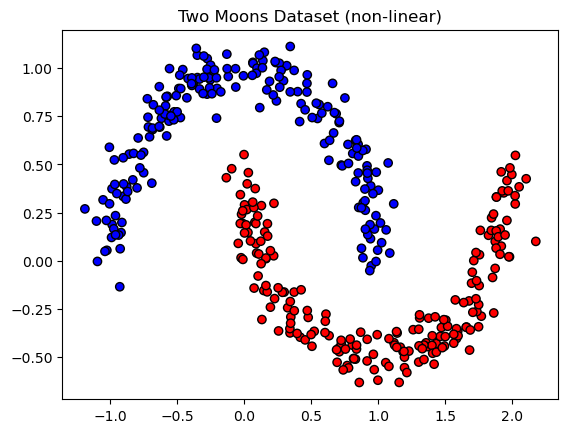

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# 1) Simple but non-linear dataset: TWO MOONS 
def make_two_moons(n_per_class=200, noise=0.08):
    t = np.random.rand(n_per_class) * np.pi  

    X0 = np.c_[np.cos(t), np.sin(t)] + noise * np.random.randn(n_per_class, 2)
    Y0 = np.zeros((n_per_class, 1), dtype=np.float32)

    X1 = np.c_[1 - np.cos(t), 1 - np.sin(t) - 0.5] + noise * np.random.randn(n_per_class, 2)
    Y1 = np.ones((n_per_class, 1), dtype=np.float32)

    X = np.vstack([X0, X1]).astype(np.float32)
    Y = np.vstack([Y0, Y1]).astype(np.float32)

    idx = np.random.permutation(len(X))
    return X[idx], Y[idx]

X, Y = make_two_moons(n_per_class=200, noise=0.08)

#visualize
plt.scatter(X[:,0], X[:,1], c=Y.ravel(), cmap="bwr", edgecolors="k")
plt.title("Two Moons Dataset (non-linear)")
plt.show()


In [21]:
class ThreeLayerNeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 6  
        hiddenLayer2Neurons = 4    
        outLayerNeurons = 1
        
        self.learning_rate = 0.1
        
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)
    
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))
    
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1)
        self.hidden1_output = self.sigmoid(hidden1_input)
        
        hidden2_input = np.dot(self.hidden1_output, self.W_H2)
        self.hidden2_output = self.sigmoid(hidden2_input)
        
        output_input = np.dot(self.hidden2_output, self.W_OH)
        pred = self.sigmoid(output_input)
        
        return pred
    
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden2_error = output_delta.dot(self.W_OH.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)
        
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)
        
        self.W_H1 += X.T.dot(hidden1_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH += self.hidden2_output.T.dot(output_delta)
    
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
    
    def predict(self, X):
        return self.feedForward(X)

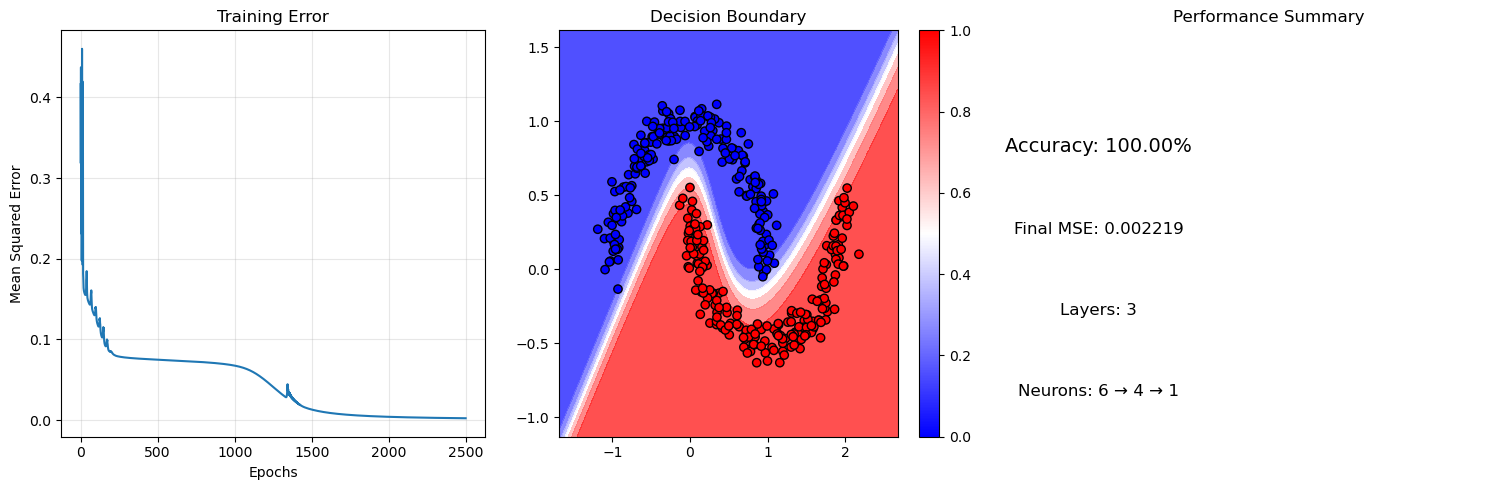


Sample Predictions:
Input: [-0.9850429   0.18740574], Expected: 0.0, Predicted: 0.0072 → 0 ✓
Input: [1.7552339  0.03061511], Expected: 1.0, Predicted: 0.9781 → 1 ✓
Input: [-0.20617937  0.74035096], Expected: 0.0, Predicted: 0.1597 → 0 ✓
Input: [ 1.4708406  -0.34743735], Expected: 1.0, Predicted: 0.9913 → 1 ✓
Input: [ 1.3568037  -0.42686486], Expected: 1.0, Predicted: 0.9907 → 1 ✓


In [22]:
NN = ThreeLayerNeuralNetwork()

err = []
for i in range(2500):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


plt.figure(figsize=(15, 5))

# Training error
plt.subplot(1, 3, 1)
plt.plot(err)
plt.title('Training Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# Decision boundary
plt.subplot(1, 3, 2)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = NN.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), cmap='bwr', edgecolors='black')
plt.title('Decision Boundary')
plt.colorbar()

plt.subplot(1, 3, 3)
predictions = NN.predict(X)
binary_pred = (predictions > 0.5).astype(int)
accuracy = np.mean(binary_pred == Y)
plt.text(0.1, 0.7, f'Accuracy: {accuracy:.2%}', fontsize=14, ha='center')
plt.text(0.1, 0.5, f'Final MSE: {err[-1]:.6f}', fontsize=12, ha='center')
plt.text(0.1, 0.3, f'Layers: 3', fontsize=12, ha='center')
plt.text(0.1, 0.1, f'Neurons: 6 → 4 → 1', fontsize=12, ha='center')
plt.axis('off')
plt.title('Performance Summary')

plt.tight_layout()
plt.show()

#some predictions
print("\nSample Predictions:")
for i in range(5):
    actual = Y[i][0]
    predicted = predictions[i][0]
    binary = 1 if predicted > 0.5 else 0
    correct = "✓" if binary == actual else "✗"
    print(f"Input: {X[i]}, Expected: {actual}, Predicted: {predicted:.4f} → {binary} {correct}")